In [ ]:
# Box-Cox 변환(Box-Cox transformation)
# 데이터의 분포를 정규 분포(정규성)에 가깝게 만들기 위해 사용하는 통계적 기법
# 회귀 분석, 분산분석(ANOVA), 시계열 분석 등에서 정규성 가정이 중요한 경우에 사용

# 목적
# 데이터의 정규성(normality) 확보
# 분산의 안정화(variance stabilization)
# 선형성(linearity) 확보
# 통계 모델의 성능 향상

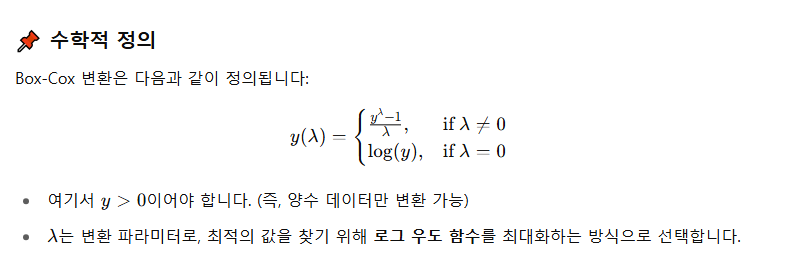
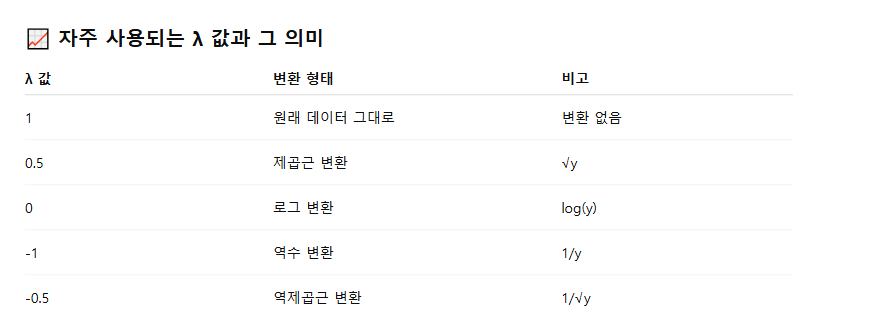

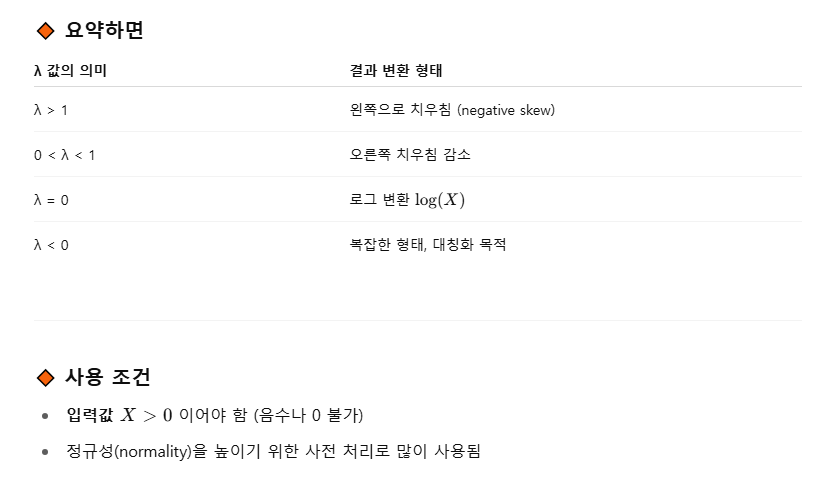

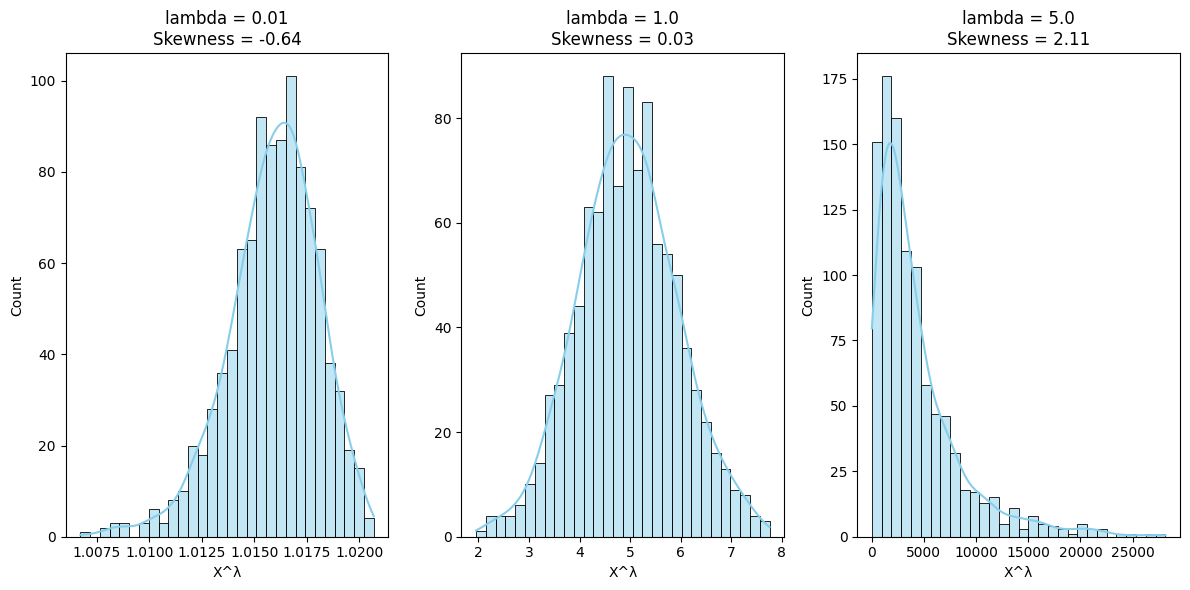

In [7]:
# λ가 1보다 크면 새로운 분포는 X보다 좌측으로 치우친다.
# 0 <= λ < 1 이라면 우측의 꼬리 영역의 길이가 짧아진다.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# 1. 원래 데이터 생성 (오른쪽으로 치우친 분포)
np.random.seed(0)
X = np.random.normal(loc=0, scale=1.0, size=1000) + 5

# 2. 다양한 lambda 값에 대해 변환
lambdas = [0.01, 1.0, 5.0]  # λ < 1, λ = 1, λ > 1
plt.figure(figsize=(12, 6))

for i, lam in enumerate(lambdas, 1):
    X_new = X ** lam
    sk = skew(X_new)
    
    plt.subplot(1, 3, i)
    sns.histplot(X_new, kde=True, bins=30, color='skyblue')
    plt.title(f"lambda = {lam}\nSkewness = {sk:.2f}")
    plt.xlabel("X^λ")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import pandas as pd

np.random.seed(1234)
original_data = np.random.exponential(scale=2.0, size=100)

df = pd.DataFrame({'original': original_data})

df

,original
0,0.425197
1,1.946298
2,1.151538
3,3.077573
4,3.028036
...,...
95,1.396559
96,1.539530
97,3.420751
98,0.117623


In [4]:
from scipy.stats import boxcox

transformed_data, best_lambda = boxcox(df['original'])

df['boxcox'] = transformed_data
df

,original,boxcox
0,0.425197,-0.741262
1,1.946298,0.748055
2,1.151538,0.144566
3,3.077573,1.371421
4,3.028036,1.347632
...,...,...
95,1.396559,0.353881
96,1.539530,0.465016
97,3.420751,1.529683
98,0.117623,-1.516591


In [5]:
best_lambda

0.34275044886727374

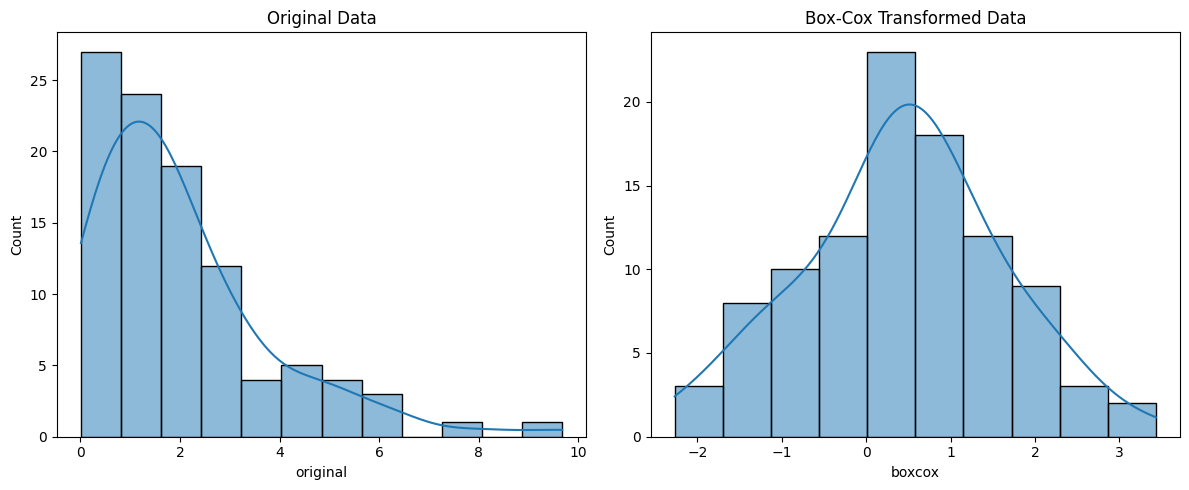

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['original'], kde=True, ax=axes[0])
axes[0].set_title('Original Data')
sns.histplot(df['boxcox'], kde=True, ax=axes[1])
axes[1].set_title('Box-Cox Transformed Data')
plt.tight_layout()

plt.show()